# HW2  Recurrent Neural Networks

The goal of this assignment is to detect whether a tweet is about a disaster or not.

## Cleaning text before analyse :

In [1]:
import numpy as np
import pandas as pd
import re

data = pd.read_csv('train.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [2]:
print(data.iloc[19]) 

id                                    28
keyword                              NaN
location                             NaN
text        What a goooooooaaaaaal!!!!!!
target                                 0
Name: 19, dtype: object


In [3]:
#We check target repartition
target_counts = data.iloc[:, -1].value_counts(dropna=False)

print("Répartition des targets :")
print(target_counts)

Répartition des targets :
target
0    4342
1    3271
Name: count, dtype: int64


There is no problem with proportions

abbreviations list to replace in texts:

In [5]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

Cleaning function:


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def word_abbrev(word):
    return abbreviations.get(word, word)

def replace_abbrev(text):
    return ' '.join(word_abbrev(word) for word in text.split())

def preprocess_text(text):
    if isinstance(text, str):
        original_text = text
        text = text.lower()
        text = re.sub(r'http\S+|www\S+|https\S+', '', text) # remove the links 
        text = re.sub(r'@\w+', '', text)
        hashtags = re.findall(r'#(\w+)', original_text)
        
        #Here we replace special caractere and ponctuation by space
        text = re.sub(r'[#%&=+/\\@]', ' ', text)
        text = re.sub(r'[^\w\s\']', ' ', text)
        text = re.sub(r'\d+', '', text)

        # and here we reduce space size to 1 space
        text = re.sub(r'\s+', ' ', text).strip()

        # replace abbreviations
        text = replace_abbrev(text)

        # we remove the most common english 
        tokens = nltk.word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        lemmatizer = WordNetLemmatizer()

        cleaned_tokens = []
        for token in tokens:
            if (token not in stop_words) or (token in [h.lower() for h in hashtags]):
                cleaned_tokens.append(lemmatizer.lemmatize(token))

        return ' '.join(cleaned_tokens)
    return ""

In [7]:
print(preprocess_text("#raining #flooding #Florida #TampaBay . I've lost count zzz pov ...    ##book http://t.co/f6ntUc734Z"))

raining flooding florida tampabay 've lost count sleeping bored tired point view book


The function seems to clean up the text well. We can now use it on the dataset and start building our lstm

In [8]:
# cleanning the dataset
cleaned_texts = []
for i in range(len(data)):
    cleaned_texts.append(preprocess_text(data.loc[i, 'text']))

data['cleaned_text'] = cleaned_texts

# Aperçu
print(data[['text', 'cleaned_text']].head())

                                                text  \
0  Our Deeds are the Reason of this #earthquake M...   
1             Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are ...   
3  13,000 people receive #wildfires evacuation or...   
4  Just got sent this photo from Ruby #Alaska as ...   

                                        cleaned_text  
0         deed reason earthquake may allah forgive u  
1              forest fire near la ronge sask canada  
2  resident asked 'shelter place ' notified offic...  
3  people receive wildfire evacuation order calif...  
4  got sent photo ruby alaska smoke wildfire pour...  


In [9]:
data.head

<bound method NDFrame.head of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  \
0     Our Deeds are the Reason of this #earthquake M...       1   
1                Forest fire near La Ronge Sask. Canada       1   
2     All residents asked to 'shelter in place' are ...       1   
3     13,000 people receive #wildfires evacuation or...       1   
4     Just got sent this photo from Ruby #Alaska as ...       1   
...                                                 ...     ...   
7608  Two giant cranes holding a bridge collapse int...       1   
7609  @aria_ahrary @TheTawniest The out of contro

The text can now be considered clean and usable.

# Split data

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# data split 
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data["target"])

# Tokenisation
max_features = 10000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(train_data['cleaned_text'])

# Conversion and padding
X_train = tokenizer.texts_to_sequences(train_data['cleaned_text'])
X_train = pad_sequences(X_train)
y_train = train_data['target']

X_test = tokenizer.texts_to_sequences(test_data['cleaned_text'])
X_test = pad_sequences(X_test)
y_test = test_data['target']

# we check reppartition to 
print(f" dataset size : {len(data)}")
print(f"Train_data : {len(train_data)} lignes")
print(f"Test_data : {len(test_data)} lignes")


print("\n labels repartition after spliting :")
unique, counts = np.unique(y_train, return_counts=True)
print("\n X_train :")
for label, count in zip(unique, counts):
    pourcentage = 100 * count / len(y_train)
    print(f"Label {label}: {pourcentage:.2f}%")

unique, counts = np.unique(y_test, return_counts=True)
print("\n X_test :")
for label, count in zip(unique, counts):
    pourcentage = 100 * count / len(y_test)
    print(f"Label {label}: {pourcentage:.2f}%")

 dataset size : 7613
Train_data : 6090 lignes
Test_data : 1523 lignes

 labels repartition after spliting :

 X_train :
Label 0: 57.03%
Label 1: 42.97%

 X_test :
Label 0: 57.06%
Label 1: 42.94%


no distribution problems in the splits

# Building LSTM

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
embed_dim = 8
lstm_out = 8
lstm_model = Sequential()
lstm_model.add(Embedding(max_features, embed_dim))
lstm_model.add(Dropout(0.35))
lstm_model.add(LSTM(lstm_out, dropout=0.3, recurrent_dropout=0.3))
lstm_model.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(learning_rate=0.0005)
lstm_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])


In [12]:
# training and evalution
history = lstm_model.fit(X_train, y_train, epochs=5, batch_size=16, validation_split=0.2, verbose=2)

test_loss, test_acc = lstm_model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/5
305/305 - 10s - 33ms/step - accuracy: 0.5659 - loss: 0.6800 - val_accuracy: 0.5739 - val_loss: 0.6604
Epoch 2/5
305/305 - 5s - 16ms/step - accuracy: 0.6248 - loss: 0.6419 - val_accuracy: 0.7069 - val_loss: 0.6010
Epoch 3/5
305/305 - 5s - 15ms/step - accuracy: 0.7701 - loss: 0.5518 - val_accuracy: 0.7816 - val_loss: 0.5026
Epoch 4/5
305/305 - 5s - 16ms/step - accuracy: 0.8389 - loss: 0.4313 - val_accuracy: 0.7964 - val_loss: 0.4586
Epoch 5/5
305/305 - 5s - 16ms/step - accuracy: 0.8678 - loss: 0.3527 - val_accuracy: 0.8013 - val_loss: 0.4589
48/48 - 1s - 18ms/step - accuracy: 0.8168 - loss: 0.4290
Test accuracy: 0.8168


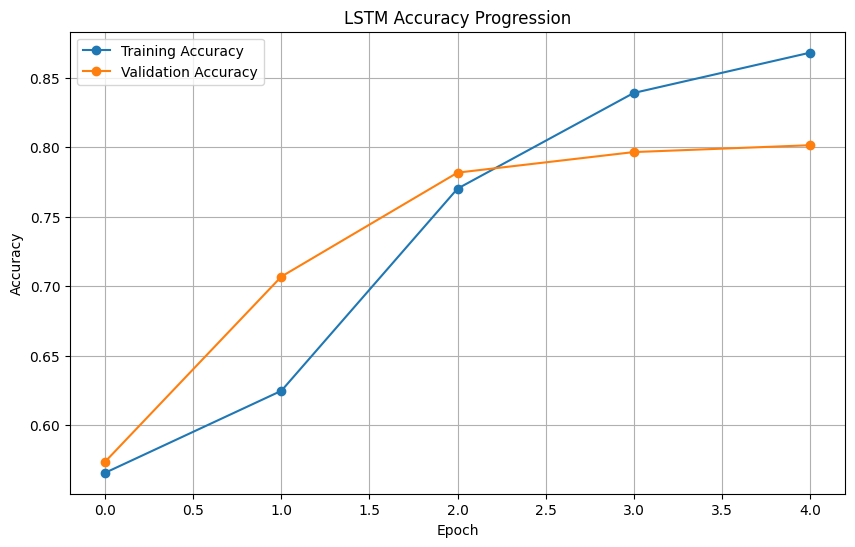

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('LSTM Accuracy Progression')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# GRU

In [48]:
from tensorflow.keras.layers import GRU

gru_model = Sequential()
gru_model.add(Embedding(input_dim=max_features, output_dim=32))
gru_model.add(Dropout(0.2))  # Même Dropout que le modèle LSTM mis à jour
gru_model.add(GRU(32, dropout=0.2, recurrent_dropout=0.4))
gru_model.add(Dense(1, activation='sigmoid'))
gru_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.02), metrics=['accuracy'])


In [15]:
# training and evalution
history = gru_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)

test_loss, test_acc = gru_model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/5
153/153 - 6s - 41ms/step - accuracy: 0.7307 - loss: 0.5351 - val_accuracy: 0.7989 - val_loss: 0.4742
Epoch 2/5
153/153 - 2s - 13ms/step - accuracy: 0.8898 - loss: 0.2807 - val_accuracy: 0.7874 - val_loss: 0.5250
Epoch 3/5
153/153 - 2s - 13ms/step - accuracy: 0.9399 - loss: 0.1690 - val_accuracy: 0.7750 - val_loss: 0.6948
Epoch 4/5
153/153 - 2s - 14ms/step - accuracy: 0.9542 - loss: 0.1215 - val_accuracy: 0.7709 - val_loss: 0.8717
Epoch 5/5
153/153 - 2s - 12ms/step - accuracy: 0.9637 - loss: 0.0958 - val_accuracy: 0.7438 - val_loss: 0.8611
48/48 - 1s - 15ms/step - accuracy: 0.7656 - loss: 0.7844
Test accuracy: 0.7656


In [17]:
from tensorflow.keras.layers import GRU, Bidirectional, BatchNormalization
from tensorflow.keras.regularizers import l2

gru_v2 = Sequential()
gru_v2.add(Embedding(input_dim=max_features, output_dim=32, embeddings_regularizer=l2(1e-4)))
gru_v2.add(Dropout(0.4))
gru_v2.add(Bidirectional(GRU(20, dropout=0.4, recurrent_dropout=0.5, kernel_regularizer=l2(1e-4))))
gru_v2.add(BatchNormalization())
gru_v2.add(Dense(16, activation='relu', kernel_regularizer=l2(1e-4)))
gru_v2.add(Dropout(0.5))
gru_v2.add(Dense(1, activation='sigmoid'))

gru_v2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

history = gru_v2.fit(X_train, y_train,epochs=5,batch_size=128,validation_split=0.2,verbose=2)

test_loss, test_acc = gru_v2.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/5
39/39 - 11s - 271ms/step - accuracy: 0.6168 - loss: 0.6907 - val_accuracy: 0.6117 - val_loss: 0.7173
Epoch 2/5
39/39 - 1s - 31ms/step - accuracy: 0.8001 - loss: 0.5242 - val_accuracy: 0.7159 - val_loss: 0.6784
Epoch 3/5
39/39 - 1s - 27ms/step - accuracy: 0.8764 - loss: 0.4261 - val_accuracy: 0.7759 - val_loss: 0.6381
Epoch 4/5
39/39 - 1s - 32ms/step - accuracy: 0.9044 - loss: 0.3876 - val_accuracy: 0.7775 - val_loss: 0.6297
Epoch 5/5
39/39 - 1s - 31ms/step - accuracy: 0.9193 - loss: 0.3798 - val_accuracy: 0.7865 - val_loss: 0.6293
48/48 - 1s - 30ms/step - accuracy: 0.7853 - loss: 0.6190
Test accuracy: 0.7853


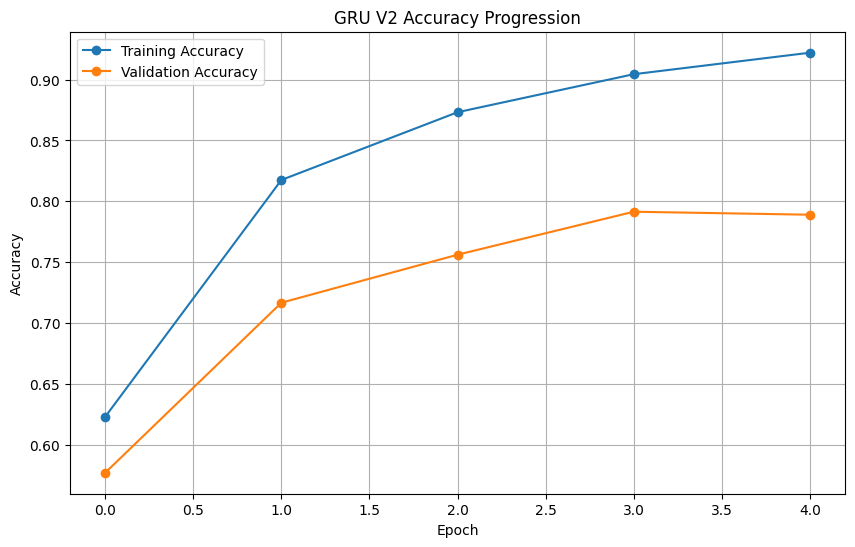

In [127]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('GRU V2 Accuracy Progression')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Model comparison add MCC evaluation

Here we create a function that aims to evaluate the two models.

In [25]:
import time
import numpy as np
from sklearn.metrics import roc_curve, auc

def train_and_evaluate_model(model):
    start_time = time.time()
    history = model.fit(
        X_train,
        y_train,
        epochs=5,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )
    train_time = time.time() - start_time

    start_time = time.time()
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
    inference_time = time.time() - start_time

    y_pred_prob = model.predict(X_test).ravel()
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Mesure de la stabilité de la loss sur la validation
    val_loss_history = history.history['val_loss']
    loss_std = np.std(val_loss_history)  # écart-type de la loss

    return {
        'accuracy': test_acc,
        'loss': test_loss,
        'loss_std': loss_std,  # stabilité (plus c'est bas, plus c'est stable)
        'roc_auc': roc_auc,
        'fpr': fpr,
        'tpr': tpr,
        'train_time': train_time,
        'inference_time': inference_time,
        'history': history,
        'params': model.count_params()
    }


Evaluation of lstm

In [26]:
lstm_results = train_and_evaluate_model(lstm_model)

Epoch 1/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9360 - loss: 0.1941 - val_accuracy: 0.8030 - val_loss: 0.5279
Epoch 2/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.9344 - loss: 0.1795 - val_accuracy: 0.7989 - val_loss: 0.5488
Epoch 3/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9406 - loss: 0.1790 - val_accuracy: 0.7898 - val_loss: 0.5775
Epoch 4/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9476 - loss: 0.1545 - val_accuracy: 0.7972 - val_loss: 0.5852
Epoch 5/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9439 - loss: 0.1660 - val_accuracy: 0.7964 - val_loss: 0.5879
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7886 - loss: 0.5970 
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [27]:
# results
print("LSTM Results:")
print(f"Accuracy: {lstm_results['accuracy']:.4f}")
print(f"Loss: {lstm_results['loss']:.4f}")
print(f"Loss Std (stability): {lstm_results['loss_std']:.4f}")
print(f"Training Time: {lstm_results['train_time']:.4f} seconds")
print(f"Inference Time: {lstm_results['inference_time']:.4f} seconds")
print(f"Number of Parameters: {lstm_results['params']}")

LSTM Results:
Accuracy: 0.8050
Loss: 0.5279
Loss Std (stability): 0.0233
Training Time: 37.5000 seconds
Inference Time: 0.5801 seconds
Number of Parameters: 80553


Evaluation of GRU

In [28]:
gru_results = train_and_evaluate_model(gru_v2)

Epoch 1/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9066 - loss: 0.5408 - val_accuracy: 0.7553 - val_loss: 0.9956
Epoch 2/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.9313 - loss: 0.5328 - val_accuracy: 0.7677 - val_loss: 1.0733
Epoch 3/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.9142 - loss: 0.5572 - val_accuracy: 0.7570 - val_loss: 1.1832
Epoch 4/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.9226 - loss: 0.5603 - val_accuracy: 0.7759 - val_loss: 1.1886
Epoch 5/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.9106 - loss: 0.5970 - val_accuracy: 0.7685 - val_loss: 1.1883
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7483 - loss: 1.2255
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [29]:
#results
print("\nGRU Results:")
print(f"Accuracy: {gru_results['accuracy']:.4f}")
print(f"Loss: {gru_results['loss']:.4f}")
print(f"Loss Std (stability): {gru_results['loss_std']:.4f}")
print(f"Training Time: {gru_results['train_time']:.4f} seconds")
print(f"Inference Time: {gru_results['inference_time']:.4f} seconds")
print(f"Number of Parameters: {gru_results['params']}")


GRU Results:
Accuracy: 0.7715
Loss: 1.1513
Loss Std (stability): 0.0786
Training Time: 48.4581 seconds
Inference Time: 1.4748 seconds
Number of Parameters: 327313


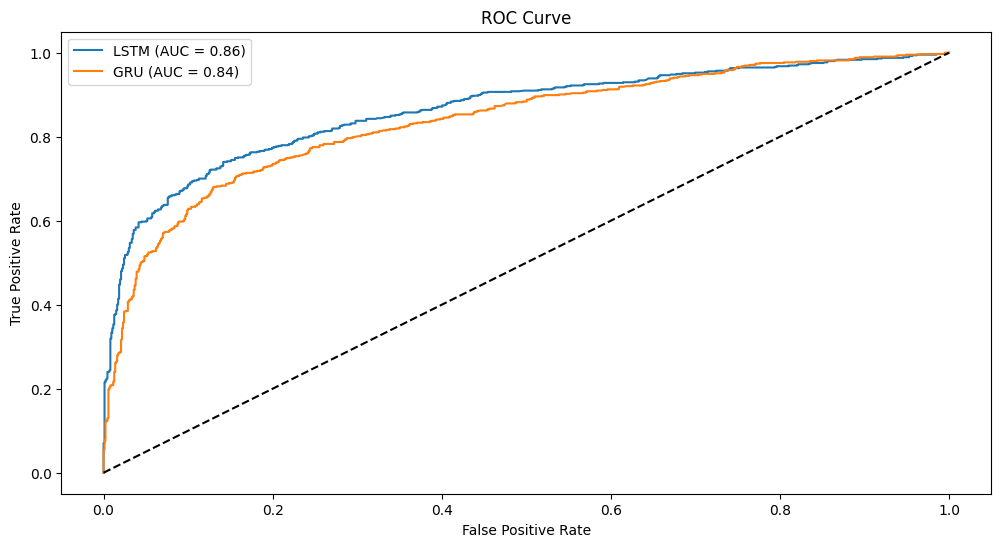

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(lstm_results['fpr'], lstm_results['tpr'], label=f'LSTM (AUC = {lstm_results["roc_auc"]:.2f})')
plt.plot(gru_results['fpr'], gru_results['tpr'], label=f'GRU (AUC = {gru_results["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Test

We're going to make the code start again from the beginning.

In [57]:
# We reload the data to make it as if we were starting from 0.
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [32]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [35]:
cleaned_texts = []
for i in range(len(train_data)):
    cleaned_texts.append(preprocess_text(train_data.loc[i, 'text']))
train_data['cleaned_text'] = cleaned_texts
print(train_data[['text', 'cleaned_text']].head())

cleaned_texts = []
for i in range(len(test_data)):
    cleaned_texts.append(preprocess_text(test_data.loc[i, 'text']))
test_data['cleaned_text'] = cleaned_texts
print(test_data[['text', 'cleaned_text']].head())


                                                text  \
0  Our Deeds are the Reason of this #earthquake M...   
1             Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are ...   
3  13,000 people receive #wildfires evacuation or...   
4  Just got sent this photo from Ruby #Alaska as ...   

                                        cleaned_text  
0         deed reason earthquake may allah forgive u  
1              forest fire near la ronge sask canada  
2  resident asked 'shelter place ' notified offic...  
3  people receive wildfire evacuation order calif...  
4  got sent photo ruby alaska smoke wildfire pour...  
                                                text  \
0                 Just happened a terrible car crash   
1  Heard about #earthquake is different cities, s...   
2  there is a forest fire at spot pond, geese are...   
3           Apocalypse lighting. #Spokane #wildfires   
4      Typhoon Soudelor kills 28 in China and Taiwan 

The cleaning is successful, we will now tokenize

In [56]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data["cleaned_text"])

X_train_full = tokenizer.texts_to_sequences(train_data["cleaned_text"])
X_train_full = pad_sequences(X_train_full)

X_test_final = tokenizer.texts_to_sequences(test_data["cleaned_text"])
X_test_final = pad_sequences(X_test_final, maxlen=X_train_full.shape[1]) 
y_train_full = train_data["target"]

Retraining models on the entire train dataset

In [50]:
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_full, y_train_full, epochs=5, batch_size=32, verbose=2)

Epoch 1/5
238/238 - 18s - 74ms/step - accuracy: 0.5918 - loss: 0.6678
Epoch 2/5
238/238 - 8s - 36ms/step - accuracy: 0.7764 - loss: 0.5299
Epoch 3/5
238/238 - 9s - 36ms/step - accuracy: 0.8352 - loss: 0.3961
Epoch 4/5
238/238 - 9s - 36ms/step - accuracy: 0.8631 - loss: 0.3350
Epoch 5/5
238/238 - 8s - 36ms/step - accuracy: 0.8874 - loss: 0.2885


In [44]:
gru_v2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gru_v2.fit(X_train_full, y_train_full, epochs=5, batch_size=128, verbose=2)

Epoch 1/5
60/60 - 21s - 350ms/step - accuracy: 0.5221 - loss: 0.7723
Epoch 2/5
60/60 - 3s - 49ms/step - accuracy: 0.6117 - loss: 0.6688
Epoch 3/5
60/60 - 3s - 47ms/step - accuracy: 0.7255 - loss: 0.5698
Epoch 4/5
60/60 - 3s - 47ms/step - accuracy: 0.8078 - loss: 0.4748
Epoch 5/5
60/60 - 3s - 50ms/step - accuracy: 0.8396 - loss: 0.4088


Predictions on the test

In [51]:
lstm_preds = lstm_model.predict(X_test_final)
gru_preds = gru_v2.predict(X_test_final)

lstm_preds = (lstm_preds > 0.5).astype(int).flatten()
gru_preds = (gru_preds > 0.5).astype(int).flatten()

102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step   
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step


CSV génération. 

In [54]:
submission = pd.DataFrame({
    'ID': test_data['id'],
    'LSTM': lstm_preds,
    'GRU': gru_preds
})

submission.to_csv("test_result.csv", index=False)


The end